In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding='iso-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# DATA CLEANING

In [3]:
df.columns.tolist()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
new_column_names = {'v1': 'Target','v2': 'Text'}
df = df.rename(columns=new_column_names)


In [7]:
df.columns.tolist()

['Target', 'Text']

In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

In [15]:
df['Target'] = df['Target'].map({'ham': 0, 'spam': 1})

# EDA

In [16]:
df['Target'].value_countscounts()

0    4516
1     653
Name: Target, dtype: int64

In [17]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
value_counts = df['Target'].value_counts()
labels = value_counts.index.tolist()

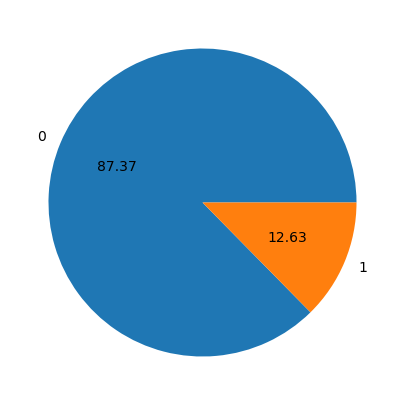

In [25]:
plt.figure(figsize=(10,5))
plt.pie(x=value_counts,labels=labels,autopct='%0.2f')
plt.show()

In [26]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_char']=df['Text'].apply(len)

In [29]:
df.head()

,Target,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df['num_word']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,Target,Text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,Target,Text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
df[df['Target']==0][['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
df[df['Target']==1][['num_char','num_word','num_sentence']].describe()

,num_char,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


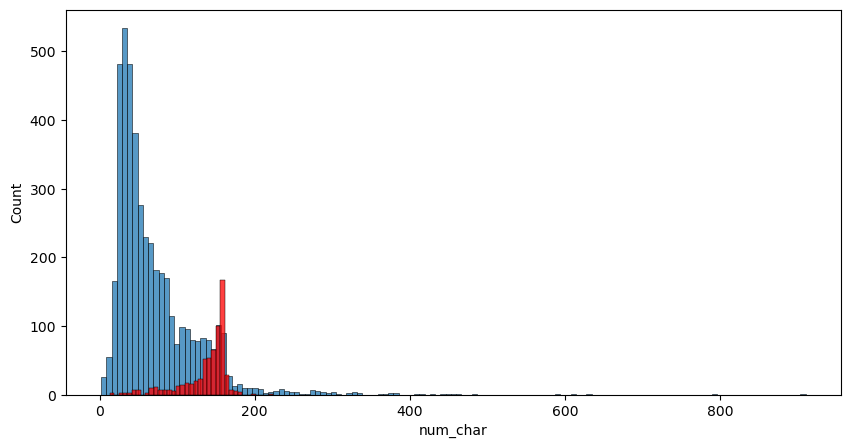

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']== 0]['num_char'])
sns.histplot(df[df['Target']== 1]['num_char'],color='red')
plt.show()

<Figure size 1000x500 with 0 Axes>

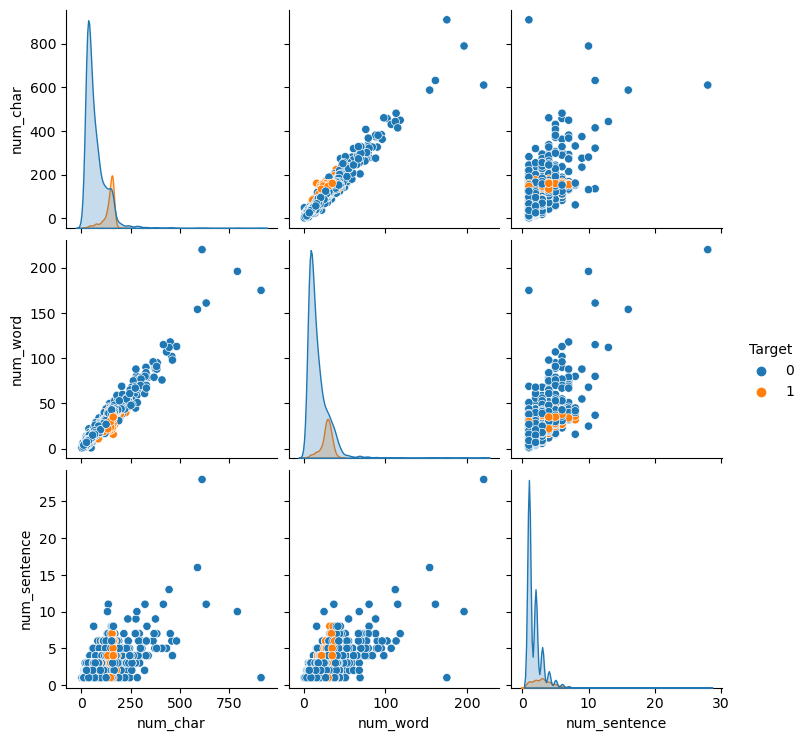

In [40]:
plt.figure(figsize=(10,5))
sns.pairplot(df,hue='Target')
plt.show()

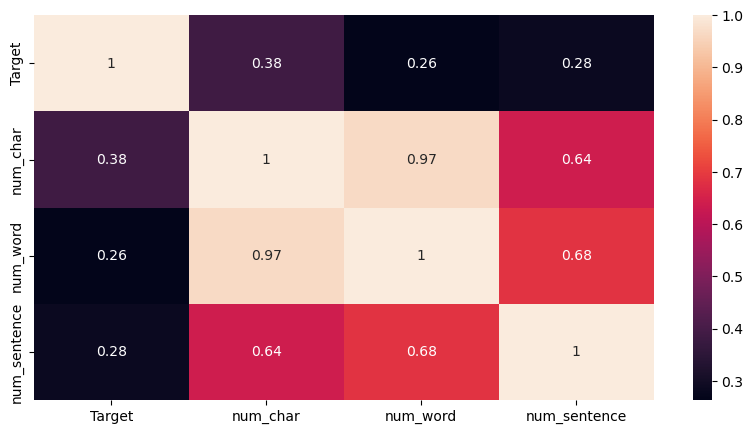

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# DATA PREPROCESSING
-- lower case tokenization removing spacial character removing stop word and punctuation stemming

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

word = 'running'
stemmed_word = stemmer.stem(word)

print(stemmed_word)

run


In [47]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        y.append(stemmer.stem(i))
            
    return " ".join(y)

In [48]:
transform_text(" Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line .")

'subject la vega high rise boom la vega fast becom major metropolitan citi 60 new high rise tower expect built around la vega strip within next 3 4 year 30 000 condominium boom begun buy first earli phase pre construct price avail la vega high rise includ trump cosmopolitan mgm turnberri icon sky among other join interest list http www verticallv com messag sent realti one highris learn www verticallv comif wish exclud futur mail pleas repli word remov subject line'

In [49]:
df['Text'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Text, dtype: object

In [50]:
df['Transform_text']=df['Text'].apply(transform_text)

In [51]:
df.head()

,Target,Text,num_char,num_word,num_sentence,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [53]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transform_text'].str.cat(sep=" "))

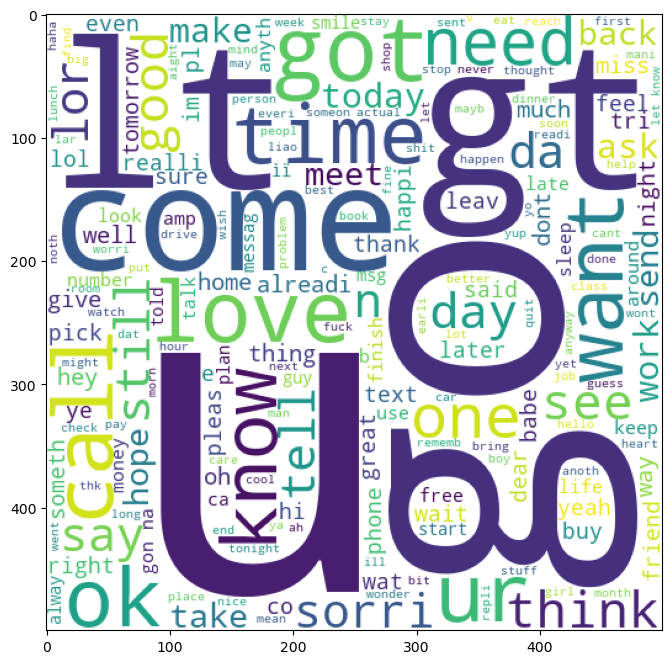

In [58]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)

In [55]:
not_spam_wc = wc.generate(df[df['Target'] == 0]['Transform_text'].str.cat(sep=" "))

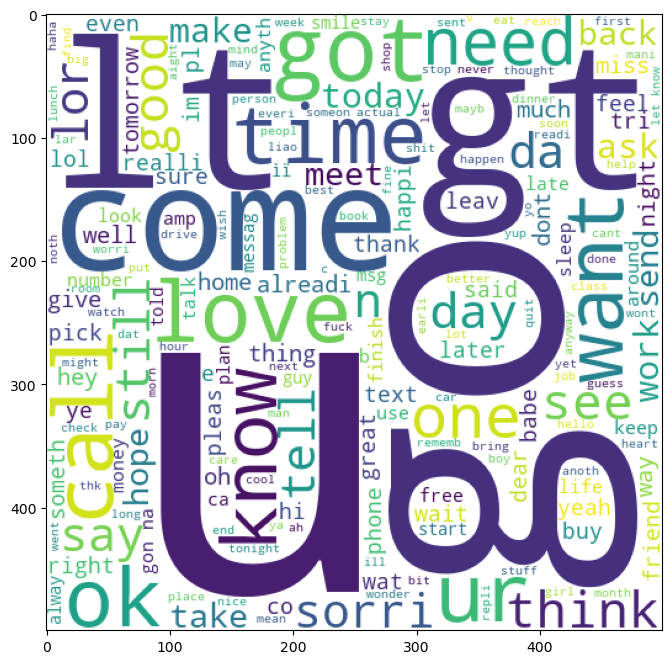

In [59]:
plt.figure(figsize=(10,8))
plt.imshow(not_spam_wc)

In [60]:
df[df['Target']== 1]['Transform_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [62]:
spam_coupus=[]
for msg in df[df['Target']== 1]['Transform_text'].tolist():
    for word in msg.split():
        spam_coupus.append(word)

In [63]:
len(spam_coupus)

9939

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


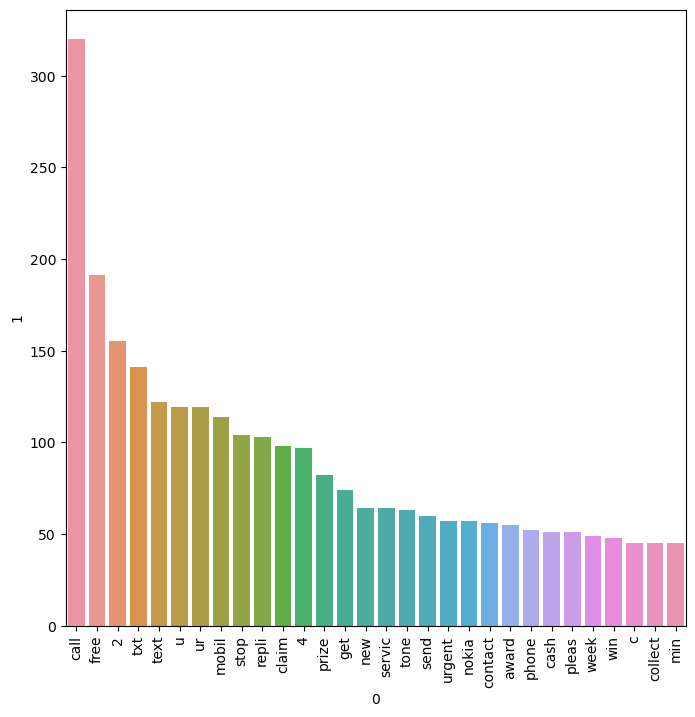

In [67]:
import collection
from collections import Counter
plt.figure(figsize=(8,8))
sns.barplot(pd.DataFrame(Counter(spam_coupus).most_common(30))[0],pd.DataFrame(Counter(spam_coupus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
not_spam_coupus=[]
for msg in df[df['Target']== 0]['Transform_text'].tolist():
    for word in msg.split():
        not_spam_coupus.append(word)

In [69]:
len(not_spam_coupus)

35394

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


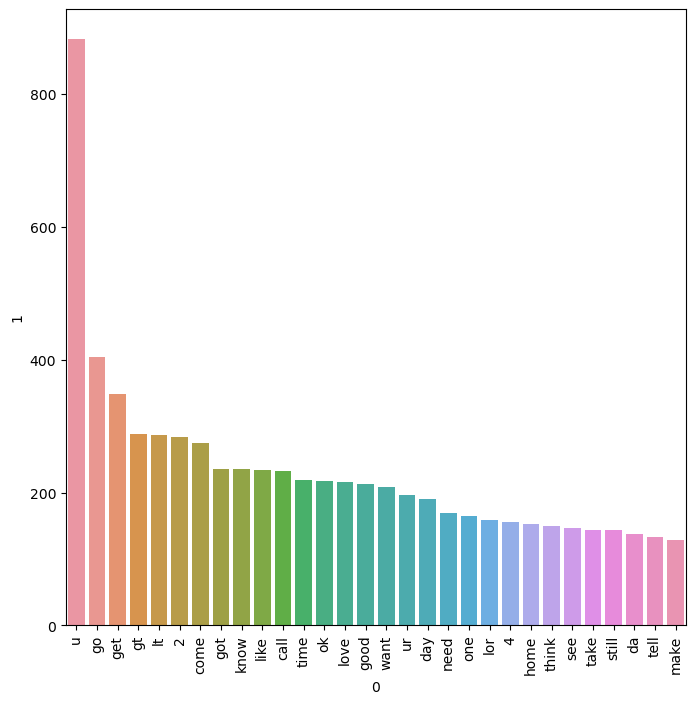

In [70]:
plt.figure(figsize=(8,8))
sns.barplot(pd.DataFrame(Counter(not_spam_coupus).most_common(30))[0],pd.DataFrame(Counter(not_spam_coupus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [81]:
x= df['Transform_text']

In [82]:
x

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Transform_text, Length: 5169, dtype: object

In [83]:
x = cv.fit_transform(x).toarray()

In [84]:
x.shape

(5169, 6708)

In [85]:
y = df['Target'].values

In [86]:
y.shape

(5169,)

In [87]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# TRAIN AND TEST SPLIT

In [89]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_prediction = lr_model.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score,classification_report

accuracy = accuracy_score(y_test,lr_prediction)
print(" accuracy :",accuracy)
report = classification_report(y_test,lr_prediction)
print(report)

 accuracy : 0.9729206963249516
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       894
           1       0.99      0.81      0.89       140

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



# Naive Bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)
nb_prediction = nb_model.predict(x_test)

In [95]:
nb_accuracy = accuracy_score(y_test,nb_prediction)
print(" accuracy :",nb_accuracy)
nb_report = classification_report(y_test,nb_prediction)
print(nb_report)

 accuracy : 0.9729206963249516
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       894
           1       0.88      0.92      0.90       140

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



# Support Vector Machine

In [96]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)
svm_prediction = svm_model.predict(x_test)

In [97]:
svm_accuracy = accuracy_score(y_test,svm_prediction)
print(" accuracy :",svm_accuracy)
svm_report = classification_report(y_test,svm_prediction)
print(svm_report)

 accuracy : 0.9671179883945842
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       894
           1       1.00      0.76      0.86       140

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034

